# UnSupervised Learning Algorithms - Hierarchical Clustering
Using any dataset implement Hierarchical Clustering (AGNES and DIANA). Plot the Dendrogram for Hierarchical Clustering 
and analyze your result. Plot the clustering output for the same dataset using these two hierarchical techniques. Compare the results. Write the inference.

#### Import libraries and load data

In [33]:
import numpy as np 
import pandas as pd 	
import matplotlib.pyplot as plt 
%matplotlib inline
import scipy.cluster.hierarchy as shc
import seaborn as sns



#### Loading the Dataset

In [34]:
df = pd.read_csv(r"./Datasets/Advertising.csv")
df.drop(['index','TV','radio'],inplace=True,axis=1)
df.head()

,newspaper,sales
0,69.2,22.1
1,45.1,10.4
2,69.3,9.3
3,58.5,18.5
4,58.4,12.9


#### Plotting the Dendograms

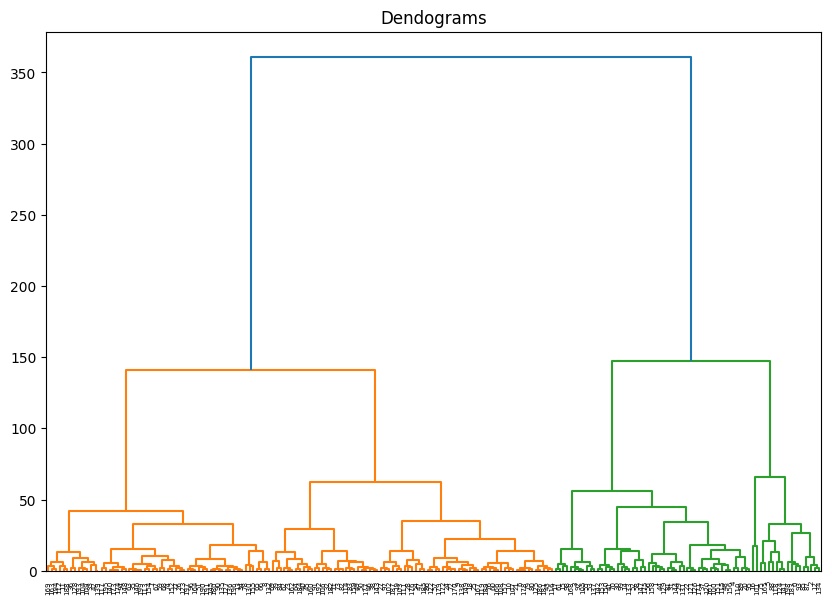

In [35]:
plt.figure(figsize=(10, 7))
plt.title("Dendograms")
dend = shc.dendrogram(shc.linkage(df, method='ward',metric="euclidean"))


#### Implementing Agglomerative Clustering - AGNES

In [36]:
from sklearn.cluster import AgglomerativeClustering

clustering_model = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
clustering_model.fit(df)
clustering_model.labels_

c:\Users\Ayush Jain\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([3, 2, 3, 2, 2, 3, 0, 1, 1, 0, 0, 1, 3, 1, 2, 2, 4, 2, 0, 0, 2, 0,
       2, 0, 0, 0, 1, 0, 0, 2, 2, 2, 0, 1, 1, 1, 1, 2, 0, 0, 0, 2, 1, 0,
       2, 0, 0, 0, 2, 0, 0, 1, 2, 2, 0, 2, 2, 0, 2, 1, 0, 2, 0, 1, 0, 1,
       1, 1, 1, 0, 2, 0, 0, 0, 1, 3, 0, 1, 1, 0, 0, 2, 0, 0, 0, 3, 0, 3,
       3, 2, 1, 0, 2, 3, 1, 2, 1, 0, 2, 2, 2, 4, 0, 0, 1, 2, 0, 0, 0, 1,
       2, 0, 1, 1, 0, 2, 0, 1, 3, 0, 2, 2, 0, 1, 3, 0, 2, 1, 1, 2, 1, 2,
       1, 2, 3, 1, 1, 2, 0, 1, 1, 3, 2, 0, 2, 1, 1, 2, 1, 0, 2, 2, 1, 2,
       1, 1, 2, 0, 2, 0, 0, 2, 0, 1, 1, 3, 0, 0, 2, 1, 0, 2, 0, 1, 1, 2,
       0, 0, 0, 0, 1, 0, 0, 3, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       3, 1], dtype=int64)

Text(0.5, 1.0, 'Newspaper vs Sales')

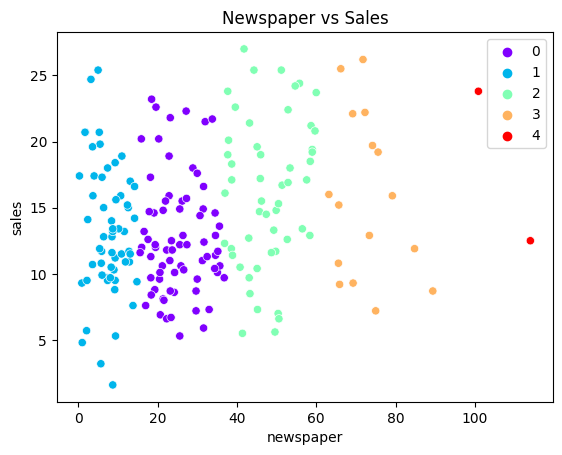

In [37]:
data_labels = clustering_model.labels_
sns.scatterplot(x='newspaper', 
                y='sales', 
                data=df, 
                hue=data_labels,
                palette="rainbow").set_title('Newspaper vs Sales')